In [8]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt
from statistics import mean

In [35]:
# Hyper Parameters 
input_size = 784
inter = 56
num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.01
momentum = 0.5

In [36]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./files', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./files', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=True)

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [37]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


In [38]:
# GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MODEL

In [39]:
class MLP1linear(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1linear, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.fc1(x))
        return out
      
class MLP1relu(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(F.relu(self.fc1(x)))
        return out

class MLP1relu2(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu2, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)    
        self.dropper = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.dropper(F.relu(self.fc1(x))))
        return out

      
class MLP1relu3(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu3, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)    
        self.dropper = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.dropper(F.relu(self.fc1(x))))
        return out
      

class MLP1relu5(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1relu5, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)    
        self.dropper = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(self.dropper(F.relu(self.fc1(x))))
        return out
      
class MLP1tanh(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1tanh, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(F.tanh(self.fc1(x)))
        return out
      
class MLP1sig(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP1tanh, self).__init__()
        self.fc1 = nn.Linear(input_size, inter)
        self.fc2 = nn.Linear(inter, num_classes)
    
    def forward(self, x):
        out = self.fc2(F.sigmoid(self.fc1(x)))
        return out

      
class MLP2linear(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP2linear, self).__init__()
        self.fc1 = nn.Linear(input_size, 300)
        self.fc2 = nn.Linear(300, inter)
        self.fc3 = nn.Linear(inter, num_classes)
    

    def forward(self, x):
        out = self.fc3(self.fc2(self.fc1(x)))
        return out

class MLP3linear(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(MLP2linear, self).__init__()
        self.fc1 = nn.Linear(input_size, 300)
        self.fc2 = nn.Linear(300, inter)
        self.fc3 = nn.Linear(inter, num_classes)

    def forward(self, x):
        out = self.fc4(self.fc3(self.fc2(self.fc1(x))))
        return out



class CNN1c(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN1c, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.fc1 = nn.Linear(1440, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = x.view(-1, 1440)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN2c(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN2c, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)


class CNN1ck3(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN1ck3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.fc1 = nn.Linear(1690, 320)
        self.fc2 = nn.Linear(320, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = x.view(-1, 1690)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
    
class CNN1ck5(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN1ck5, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.fc1 = nn.Linear(1440, 320)
        self.fc2 = nn.Linear(320, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = x.view(-1, 1440)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN1ck7(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN1ck7, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=7)
        self.fc1 = nn.Linear(1210, 320)
        self.fc2 = nn.Linear(320, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = x.view(-1, 1210)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN2cLinear(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN2cLinear, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = (F.max_pool2d(self.conv1(x), 2))
        x = (F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = (self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN2cTanh(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN2cTanh, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.tanh(F.max_pool2d(self.conv1(x), 2))
        x = F.tanh(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN2cSigmoid(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN2cSigmoid, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.sigmoid(F.max_pool2d(self.conv1(x), 2))
        x = F.sigmoid(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN1cNK5(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN1cNK5, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, kernel_size=5)
        self.fc1 = nn.Linear(720, 320)
        self.fc2 = nn.Linear(320, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = x.view(-1, 720)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN1cNK10(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN1cNK10, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.fc1 = nn.Linear(1440, 320)
        self.fc2 = nn.Linear(320, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = x.view(-1, 1440)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN1cNK20(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN1cNK20, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.fc1 = nn.Linear(2880, 320)
        self.fc2 = nn.Linear(320, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = x.view(-1, 2880)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)


In [40]:

def test(test_loader,device,model,criterion,reshape):
  correct = 0
  total = 0
  test_loss = []
  for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      if reshape==1:
          images = Variable(images.view(-1, 28*28))
      outputs = model(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
      test_loss.append(loss.item())
  
  return (int( (100 * correct / total))),mean(test_loss)
      


def runner(input_size, inter, num_classes, filename,train_loader, test_loader,learning_rate,device,num_epochs,momentum,model_class,criterion,reshape):
  model = model_class(input_size, inter, num_classes)
  model.to(device)
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
  training_losses = []
  accuracy = []
  test_loss = []
  accuracy_test = []
  for epoch in range(num_epochs):
      print(epoch,num_epochs)
      correct = 0
      train_loss = []
      total = 0
      for i, (images, labels) in enumerate(train_loader):
          images = images.to(device)
          labels = labels.to(device)
          if reshape==1:
              images = Variable(images.view(-1, 28*28))
          labels = Variable(labels)
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          total += labels.size(0)
          _, predicted = torch.max(outputs.data, 1)
          correct += (predicted==labels).sum()
          loss.backward()
          optimizer.step()
          train_loss.append(loss.item())
      acc, lo = test(test_loader,device,model,criterion,reshape)
      test_loss.append(lo)
      training_losses.append(mean(train_loss))
      accuracy_test.append(acc)
      accuracy.append(int( (100 * correct / total)))
      

#   accuracy = int( (100 * correct / total))
  fig = plt.figure()
  plt.plot(range(len(training_losses)+1)[1:], training_losses,label='Train')
  plt.plot(range(len(test_loss)+1)[1:], test_loss,label='Test')
  plt.title('Loss vs Epoch - ' + str(filename))
  plt.xlabel('Epochs')
  plt.legend()
  plt.ylabel('Loss')
  plt.savefig(str(filename) + ' loss vs epoch.png')
  plt.clf()
  fig = plt.figure()
  plt.plot(range(len(accuracy)+1)[1:], accuracy,label='Train')
  plt.plot(range(len(accuracy_test)+1)[1:], accuracy_test,label='Test')
  plt.title('Accuracy vs Epoch - ' + str(filename))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig(str(filename) + ' accuracy vs epoch.png')
  return [accuracy_test,test_loss]

def plot_losses(losses,title,loa=1):
  # loa == loss or accuracy
  ylabel = 'Accuracy'
  if loa == 2:
    ylabel = 'Loss'
  
  fig = plt.figure()
  for _loss in losses:
    loss = _loss[loa]
    label = _loss[0]
    plt.plot(range(len(loss)+1)[1:], loss,label=label)
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel(ylabel)
  plt.legend()
  plt.savefig(title+'.png')
  

0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:130: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:145: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:159: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:173: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:235: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:249: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:263: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:189: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:221: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/strider/anaconda3/envs/fai/lib/python3.6/sit

0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15


<Figure size 432x288 with 0 Axes>

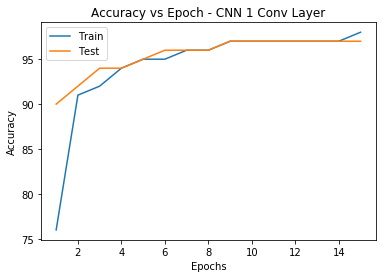

<Figure size 432x288 with 0 Axes>

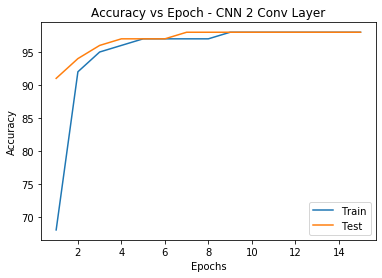

<Figure size 432x288 with 0 Axes>

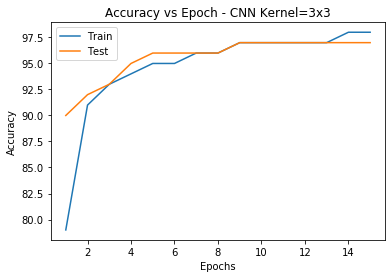

<Figure size 432x288 with 0 Axes>

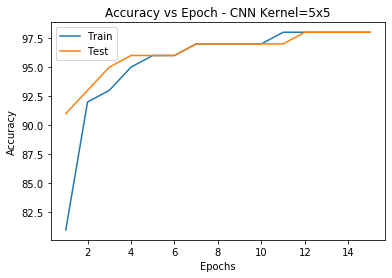

<Figure size 432x288 with 0 Axes>

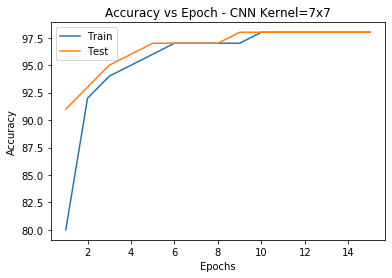

<Figure size 432x288 with 0 Axes>

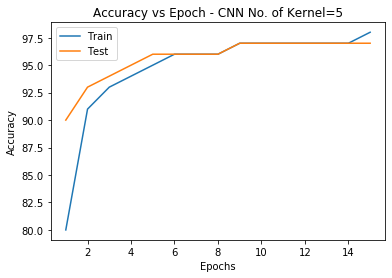

<Figure size 432x288 with 0 Axes>

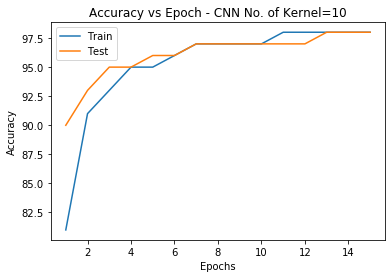

<Figure size 432x288 with 0 Axes>

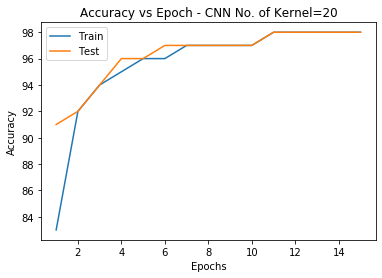

<Figure size 432x288 with 0 Axes>

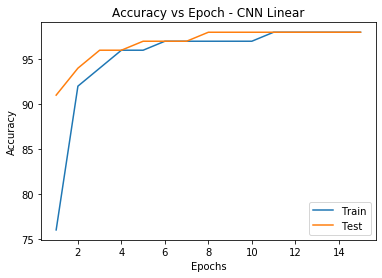

<Figure size 432x288 with 0 Axes>

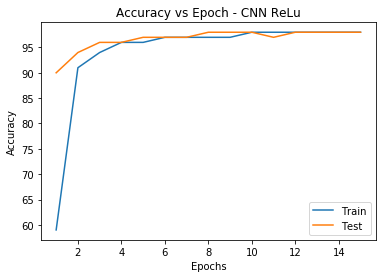

<Figure size 432x288 with 0 Axes>

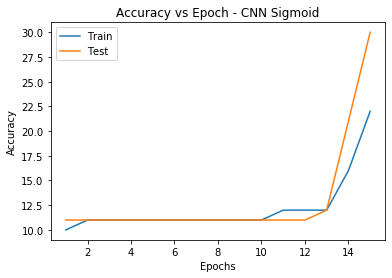

<Figure size 432x288 with 0 Axes>

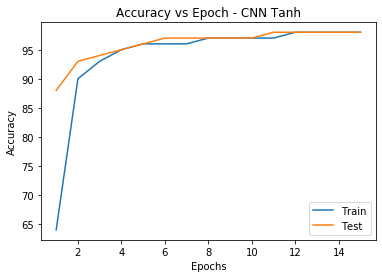

In [42]:
conv_layers = []
conv_activation = []
conv_nkernel = []
conv_kernelsize = []


filename = 'CNN 1 Conv Layer'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN1c,F.nll_loss,0)
conv_layers.append(z)

filename = 'CNN 2 Conv Layer'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN2c,F.nll_loss,0)
conv_layers.append(z)

filename = 'CNN Kernel=3x3'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN1ck3,F.nll_loss,0)
conv_kernelsize.append(z)

filename = 'CNN Kernel=5x5'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN1ck5,F.nll_loss,0)
conv_kernelsize.append(z)

filename = 'CNN Kernel=7x7'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN1ck7,F.nll_loss,0)
conv_kernelsize.append(z)

filename = 'CNN No. of Kernel=5'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN1cNK5,F.nll_loss,0)
conv_nkernel.append(z)

filename = 'CNN No. of Kernel=10'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN1cNK10,F.nll_loss,0)
conv_nkernel.append(z)

filename = 'CNN No. of Kernel=20'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN1cNK20,F.nll_loss,0)
conv_nkernel.append(z)

filename = 'CNN Linear'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN2cLinear,F.nll_loss,0)
conv_activation.append(z)

filename = 'CNN ReLu'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN2c,F.nll_loss,0)
conv_activation.append(z)

filename = 'CNN Sigmoid'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN2cSigmoid,F.nll_loss,0)
conv_activation.append(z)

filename = 'CNN Tanh'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN2cTanh,F.nll_loss,0)
conv_activation.append(z)


# filename = 'MLP 1 Hidden Layer Relu With 50% dropout'
# z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,MLP1relu5,nn.CrossEntropyLoss())
# dropouts.append(z)

In [50]:
conv_dropout = []

class CNN2c2dr(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN2c2dr, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

class CNN2c5dr(nn.Module):
    def __init__(self, input_size, inter,num_classes):
        super(CNN2c5dr, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(p=0.5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    

0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15


<Figure size 432x288 with 0 Axes>

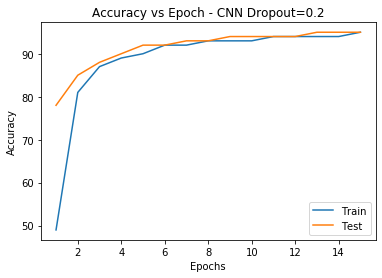

In [48]:
filename = 'CNN Dropout=0.2'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN2c2dr,F.nll_loss,0)
conv_activation.append(z)

0 15


/home/strider/anaconda3/envs/fai/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15


<Figure size 432x288 with 0 Axes>

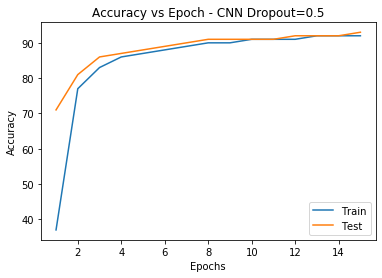

In [51]:
filename = 'CNN Dropout=0.5'
z = [filename] + runner(784,56,10,filename,train_loader,test_loader,learning_rate,device,num_epochs,momentum,CNN2c5dr,F.nll_loss,0)
conv_activation.append(z)


In [58]:
conv_dropout = []

In [59]:
conv_dropout.append(conv_activation[-1])


In [60]:
conv_dropout.append(conv_activation[-2])

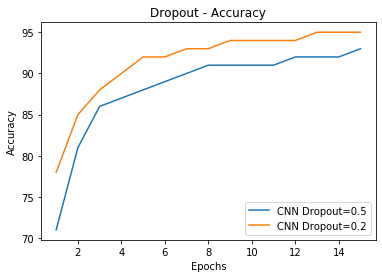

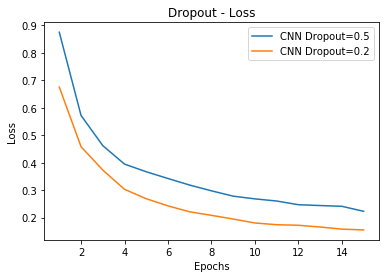

In [62]:
        plot_losses(conv_dropout,'Dropout - Accuracy')
        plot_losses(conv_dropout,'Dropout - Loss',loa=2)

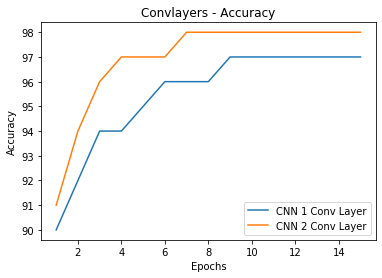

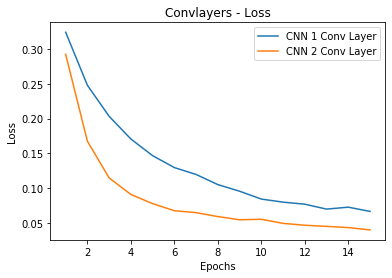

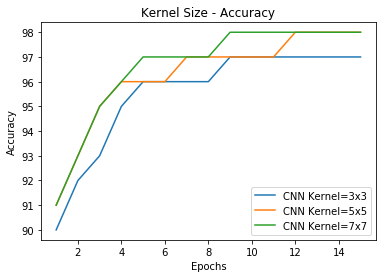

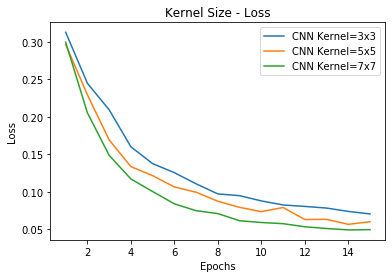

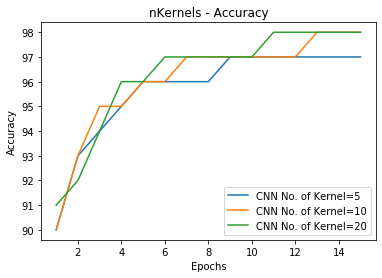

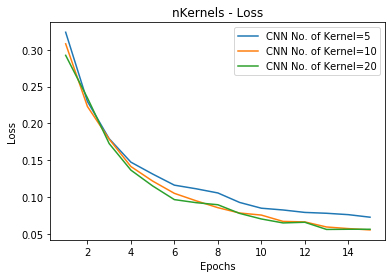

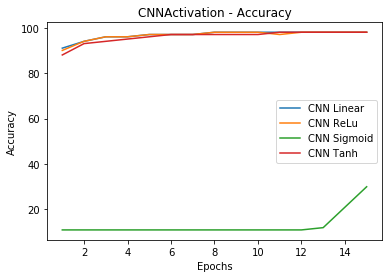

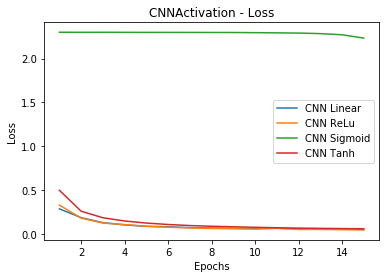

In [44]:
# plot_losses(activation,'Multi Layer Perceptron - Activation Functions')
# plot_losses(layers,'Multi Layer Perceptron - Different Layers')
# print(activation)
plot_losses(conv_layers,'Convlayers - Accuracy')
plot_losses(conv_layers,'Convlayers - Loss',loa=2)

plot_losses(conv_kernelsize,'Kernel Size - Accuracy')
plot_losses(conv_kernelsize,'Kernel Size - Loss',loa=2)

plot_losses(conv_nkernel,'nKernels - Accuracy')
plot_losses(conv_nkernel,'nKernels - Loss',loa=2)

plot_losses(conv_activation,'CNNActivation - Accuracy')
plot_losses(conv_activation,'CNNActivation - Loss',loa=2)

In [89]:
try:
  from google.colab import files
  !zip output.zip *.png
  while 1:
    try:
      files.download('output.zip')
      break
    except:
      continue
except:
  pass

  adding: MLP 1 Hidden Layer Linear accuracy vs epoch.png (deflated 8%)
  adding: MLP 1 Hidden Layer Linear loss vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer Relu accuracy vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer Relu loss vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer Relu With 20% dropout accuracy vs epoch.png (deflated 5%)
  adding: MLP 1 Hidden Layer Relu With 20% dropout loss vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer tanH accuracy vs epoch.png (deflated 6%)
  adding: MLP 1 Hidden Layer tanH loss vs epoch.png (deflated 5%)
  adding: Multi Layer Perceptron - Activation Functions.png (deflated 6%)
  adding: Multi Layer Perceptron - Different Layers.png (deflated 8%)
  adding: Overfitting - Accuracy with dropout.png (deflated 5%)
  adding: Overfitting - Loss with dropout.png (deflated 5%)


[1, 2, 3]